# Monkeypox Portfolio


https://www.cdc.gov/poxvirus/monkeypox/index.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tabulate import tabulate
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['SPY', 'SIGA', 'TNXP','CMRX','EBS','INO', 'AEMD', 'GOVX']
start = '2022-01-01'
end = '2022-05-20'

title = 'Monkey Pox'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  8 of 8 completed


,AEMD,CMRX,EBS,GOVX,INO,SIGA,SPY,TNXP
Date,,,,,,,,
2022-01-03,1.96,6.80,47.970001,3.93,5.20,7.150952,476.230530,12.80
2022-01-04,1.92,6.75,47.169998,3.91,5.02,7.028794,476.071014,11.84
2022-01-05,1.83,6.11,46.259998,3.72,4.67,6.756287,466.929443,11.20
2022-01-06,1.75,6.17,48.349998,3.58,4.65,6.756287,466.490784,10.88
2022-01-07,1.82,6.00,48.779999,3.54,4.61,6.605939,464.646515,10.88


In [3]:
df.tail()

,AEMD,CMRX,EBS,GOVX,INO,SIGA,SPY,TNXP
Date,,,,,,,,
2022-05-13,1.03,4.24,28.740000,0.670,1.99,7.01,401.720001,4.16
2022-05-16,1.06,1.66,28.620001,0.646,1.89,7.36,400.089996,2.88
2022-05-17,1.11,1.75,29.670000,0.680,1.99,7.28,408.320007,2.21
2022-05-18,1.07,1.81,28.340000,0.671,1.84,7.39,391.859985,1.92
2022-05-19,1.11,2.20,31.690001,0.731,1.97,8.65,389.459991,2.21


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

0 years


In [7]:
num_stocks = len(symbols) - 1 #Remove SPY
n = round(1.0 / float(num_stocks), 4)
weights = [n] * num_stocks
weights = np.array(weights)
weights

array([0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429])

In [8]:
Cash = 100000
print('Percentage of invest:')
percent_invest = weights
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
AEMD: 14290.0
CMRX: 14290.0
EBS: 14290.0
GOVX: 14290.0
INO: 14290.0
SIGA: 14290.0
SPY: 14290.0


In [9]:
print('Number of Shares:')
percent_invest = weights
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
AEMD: 7290
CMRX: 2101
EBS: 297
GOVX: 3636
INO: 2748
SIGA: 1998
SPY: 30


In [10]:
print('Beginning Value:')
percent_invest = weights
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
AEMD: $14288.4
CMRX: $14286.8
EBS: $14247.09
GOVX: $14289.48
INO: $14289.6
SIGA: $14287.6
SPY: $14286.92


In [11]:
print('Current Value:')
percent_invest = weights
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
AEMD: $8091.9
CMRX: $4622.2
EBS: $9411.93
GOVX: $2657.92
INO: $5413.56
SIGA: $17282.7
SPY: $11683.8


In [12]:
result = []
percent_invest = weights
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $59164.01


In [13]:
print('Holding Period Return:') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {}%'.format(i, round(HPR,4)*100))

Holding Period Return:
Holding Period Return: AEMD: -43.37%
Holding Period Return: CMRX: -67.65%
Holding Period Return: EBS: -33.94%
Holding Period Return: GOVX: -81.39999999999999%
Holding Period Return: INO: -62.12%
Holding Period Return: SIGA: 20.96%
Holding Period Return: SPY: -18.22%
Holding Period Return: TNXP: -82.73%


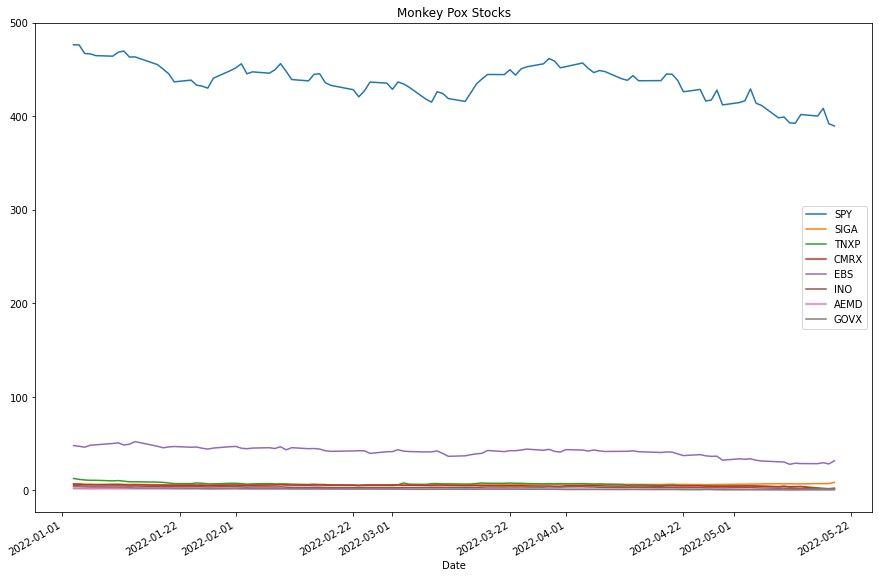

In [14]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.title(title + ' Stocks')
plt.legend()

In [15]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

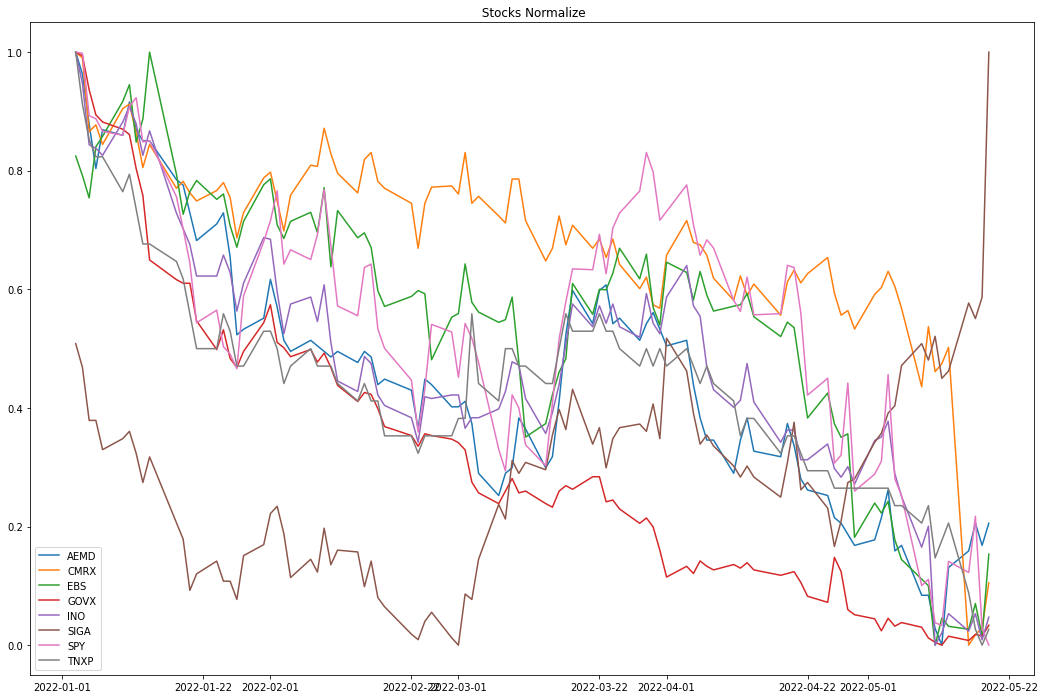

In [16]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [17]:
df.min()

AEMD      0.890000
CMRX      1.660000
EBS      27.969999
GOVX      0.620000
INO       1.810000
SIGA      5.600483
SPY     389.459991
TNXP      1.920000
dtype: float64

In [18]:
for s in symbols:
    print(s + ":",  df[s].max())

SPY: 476.23052978515625
SIGA: 8.649999618530273
TNXP: 12.800000190734863
CMRX: 6.800000190734863
EBS: 52.220001220703125
INO: 5.199999809265137
AEMD: 1.9600000381469727
GOVX: 3.930000066757202


In [19]:
# Creating a Return Data Frame for all individual stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,SPY Return,SIGA Return,TNXP Return,CMRX Return,EBS Return,INO Return,AEMD Return,GOVX Return
Date,,,,,,,,
2022-01-04,-0.000335,-0.017083,-0.075000,-0.007353,-0.016677,-0.034615,-0.020408,-0.005089
2022-01-05,-0.019202,-0.038770,-0.054054,-0.094815,-0.019292,-0.069721,-0.046875,-0.048593
2022-01-06,-0.000939,0.000000,-0.028571,0.009820,0.045179,-0.004283,-0.043716,-0.037634
2022-01-07,-0.003953,-0.022253,0.000000,-0.027553,0.008893,-0.008602,0.040000,-0.011173


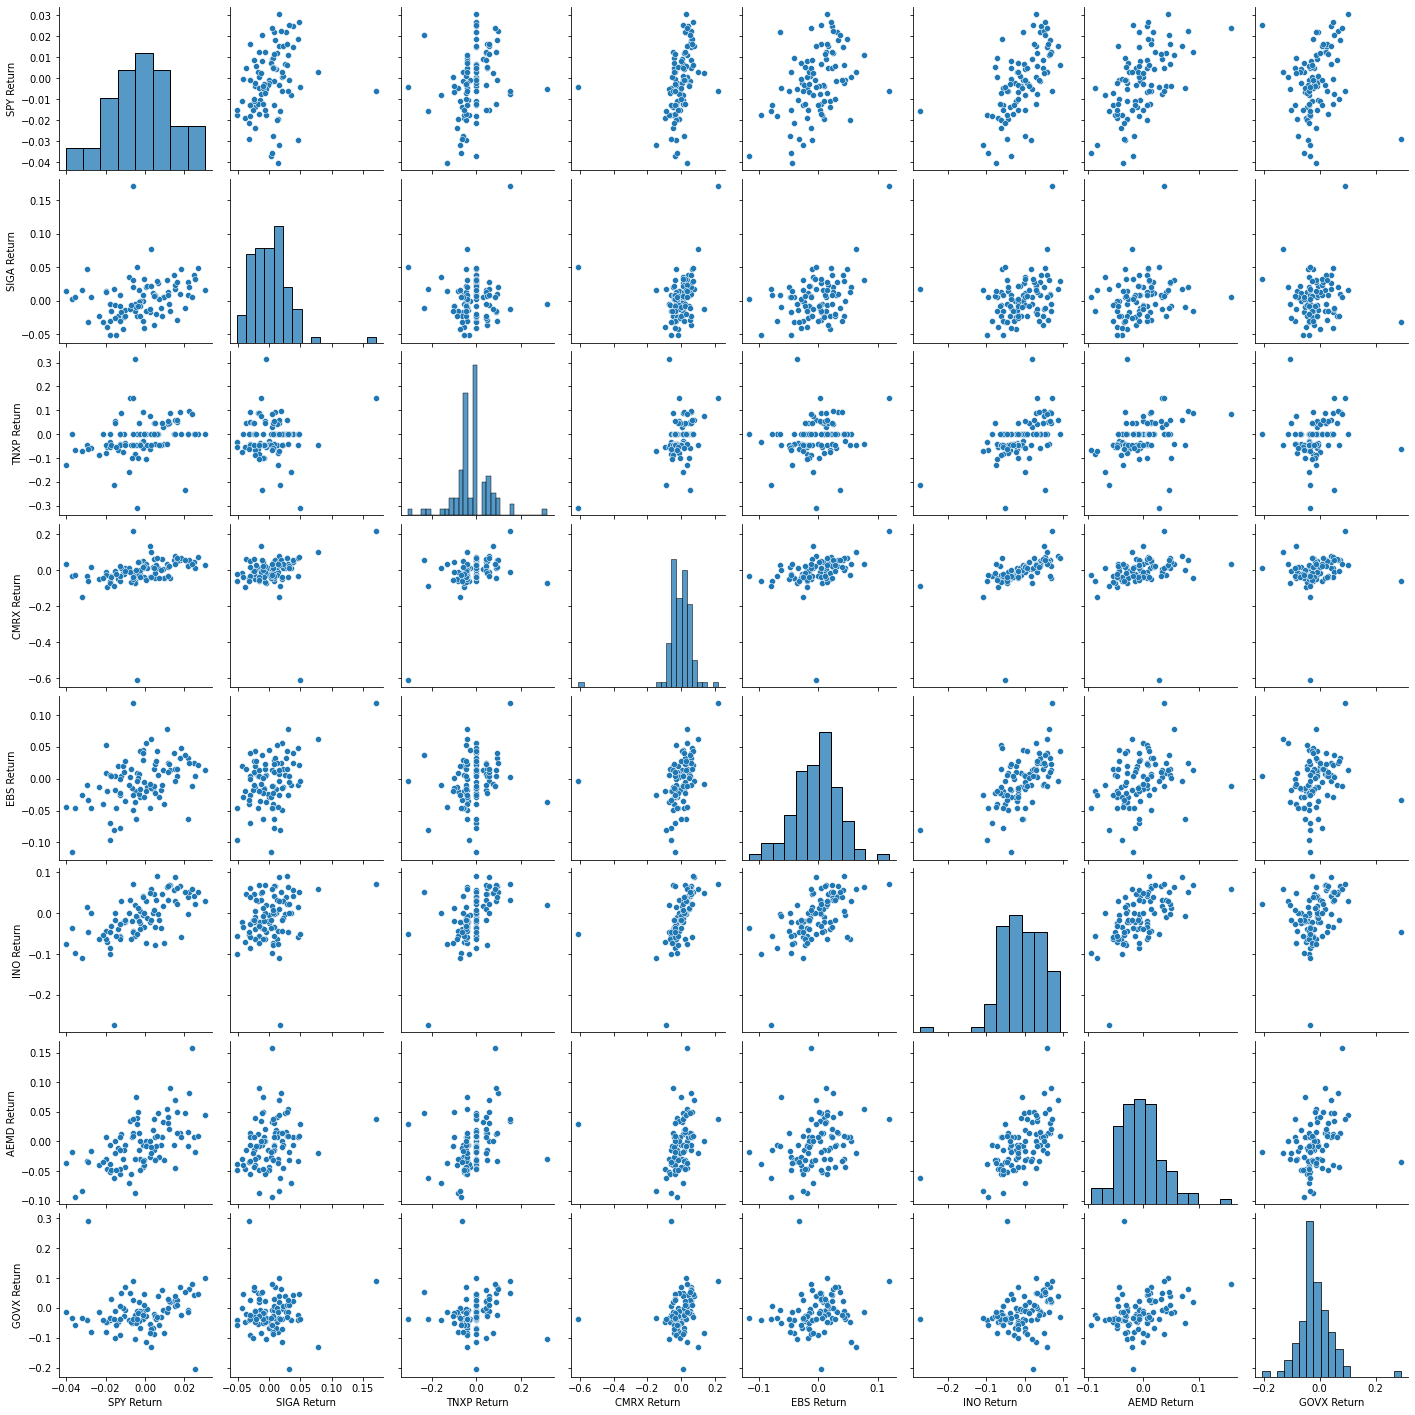

In [20]:
sns.pairplot(returns[1:] )

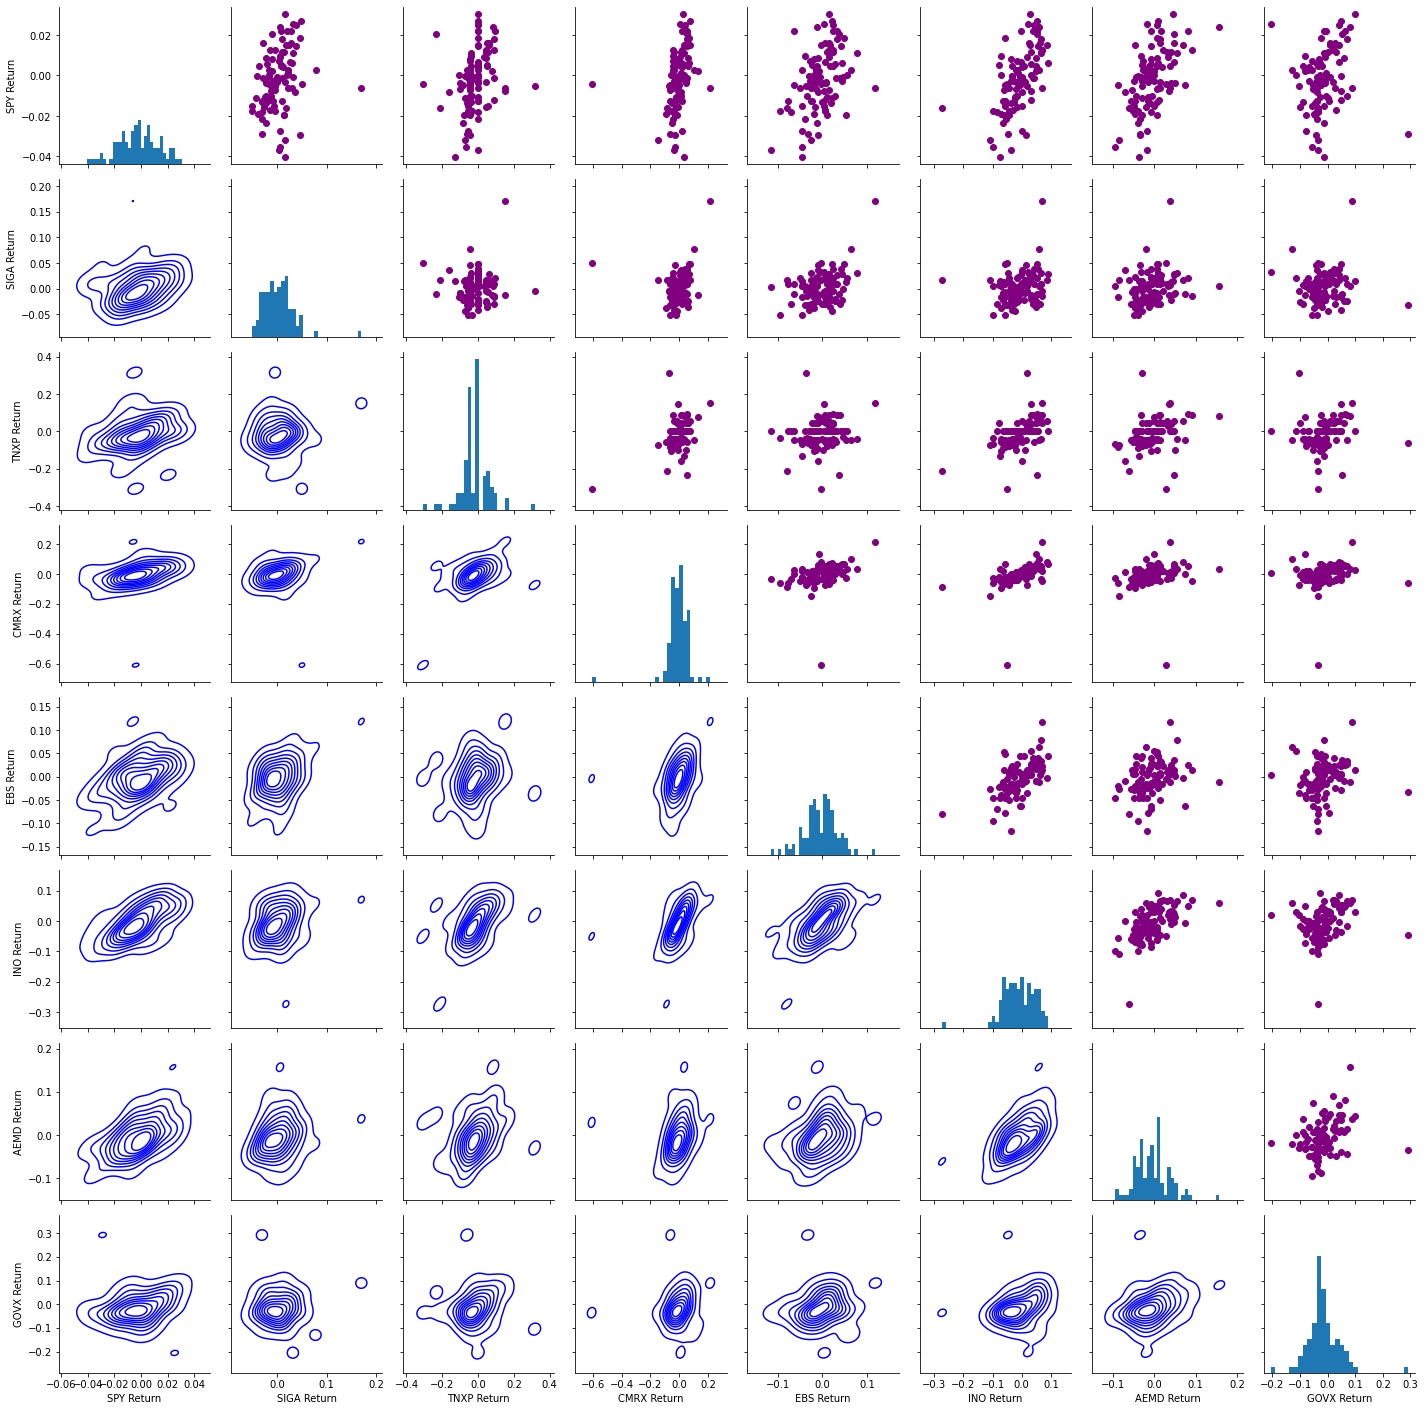

In [21]:
nplot = len(returns.columns)

ax = sns.PairGrid(returns)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

<AxesSubplot:>

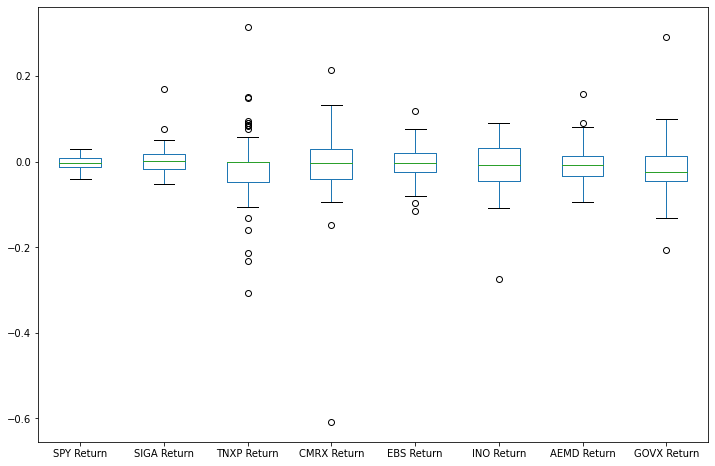

In [22]:
returns.plot(kind='box',figsize=(12,8))

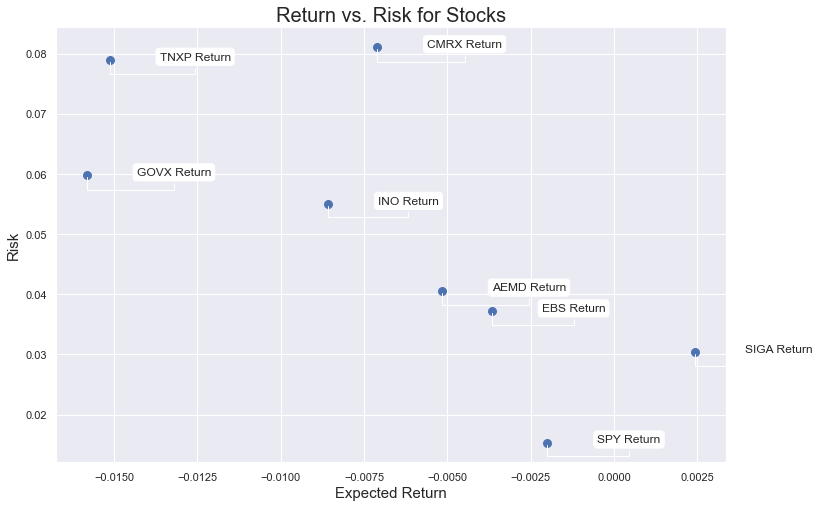

In [23]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(returns.columns, returns.mean(), returns.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [24]:
table = pd.DataFrame()
table['Average Returns'] = returns.mean()
table['Minimum Returns'] = returns.min()
table['Maximum Returns'] = returns.max()
table['Median Returns'] = returns.median()
table['Risk'] = returns.std()
table.sort_values(by='Average Returns')

,Average Returns,Minimum Returns,Maximum Returns,Median Returns,Risk
GOVX Return,-0.015815,-0.205825,0.292200,-0.022857,0.059749
TNXP Return,-0.015131,-0.307692,0.315789,0.000000,0.078965
INO Return,-0.008578,-0.273092,0.091575,-0.008602,0.055014
CMRX Return,-0.007107,-0.608491,0.215470,-0.003883,0.081052
AEMD Return,-0.005162,-0.094017,0.157303,-0.007299,0.040592
EBS Return,-0.003666,-0.115542,0.118207,-0.003061,0.037143
SPY Return,-0.001998,-0.040312,0.030453,-0.002509,0.015350
SIGA Return,0.002445,-0.051532,0.170501,0.002797,0.030351


In [25]:
table.sort_values(by='Risk')

,Average Returns,Minimum Returns,Maximum Returns,Median Returns,Risk
SPY Return,-0.001998,-0.040312,0.030453,-0.002509,0.015350
SIGA Return,0.002445,-0.051532,0.170501,0.002797,0.030351
EBS Return,-0.003666,-0.115542,0.118207,-0.003061,0.037143
AEMD Return,-0.005162,-0.094017,0.157303,-0.007299,0.040592
INO Return,-0.008578,-0.273092,0.091575,-0.008602,0.055014
GOVX Return,-0.015815,-0.205825,0.292200,-0.022857,0.059749
TNXP Return,-0.015131,-0.307692,0.315789,0.000000,0.078965
CMRX Return,-0.007107,-0.608491,0.215470,-0.003883,0.081052


In [26]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

SPY Return    2022-05-04
SIGA Return   2022-05-19
TNXP Return   2022-03-03
CMRX Return   2022-05-19
EBS Return    2022-05-19
INO Return    2022-05-02
AEMD Return   2022-05-13
GOVX Return   2022-04-26
dtype: datetime64[ns]


In [27]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

SPY Return    2022-05-18
SIGA Return   2022-04-21
TNXP Return   2022-05-16
CMRX Return   2022-05-16
EBS Return    2022-04-29
INO Return    2022-05-11
AEMD Return   2022-05-05
GOVX Return   2022-04-28
dtype: datetime64[ns]


In [28]:
returns.corr()

,SPY Return,SIGA Return,TNXP Return,CMRX Return,EBS Return,INO Return,AEMD Return,GOVX Return
SPY Return,1.000000,0.254026,0.281539,0.321474,0.427726,0.594543,0.555738,0.157190
SIGA Return,0.254026,1.000000,0.056380,0.200985,0.419434,0.257581,0.222501,0.026085
TNXP Return,0.281539,0.056380,1.000000,0.471274,0.197410,0.510066,0.310480,0.135817
CMRX Return,0.321474,0.200985,0.471274,1.000000,0.359687,0.495073,0.217544,0.142439
EBS Return,0.427726,0.419434,0.197410,0.359687,1.000000,0.594624,0.294091,0.159976
INO Return,0.594543,0.257581,0.510066,0.495073,0.594624,1.000000,0.579069,0.227885
AEMD Return,0.555738,0.222501,0.310480,0.217544,0.294091,0.579069,1.000000,0.300959
GOVX Return,0.157190,0.026085,0.135817,0.142439,0.159976,0.227885,0.300959,1.000000


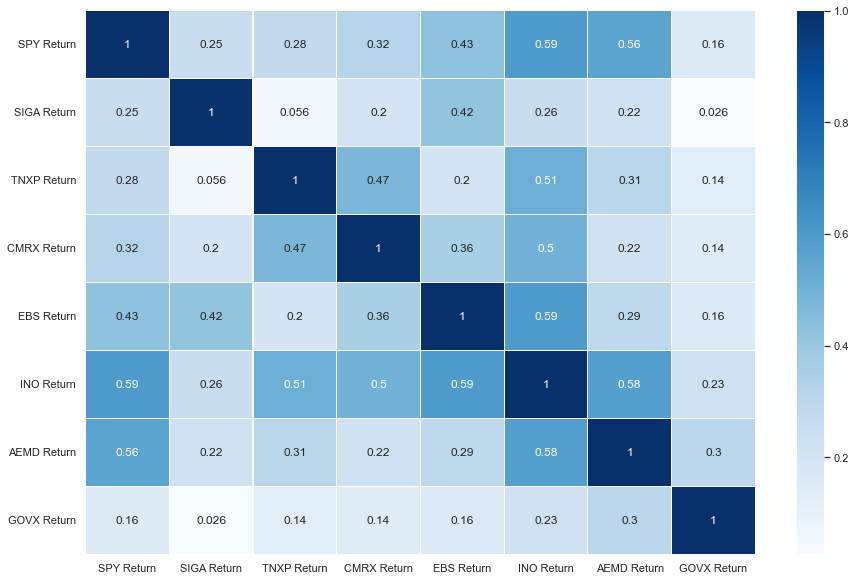

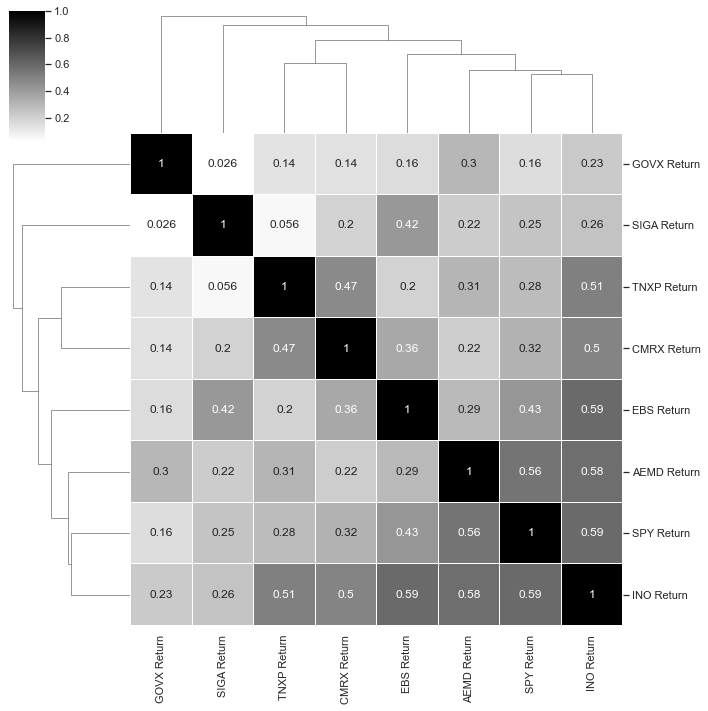

In [29]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

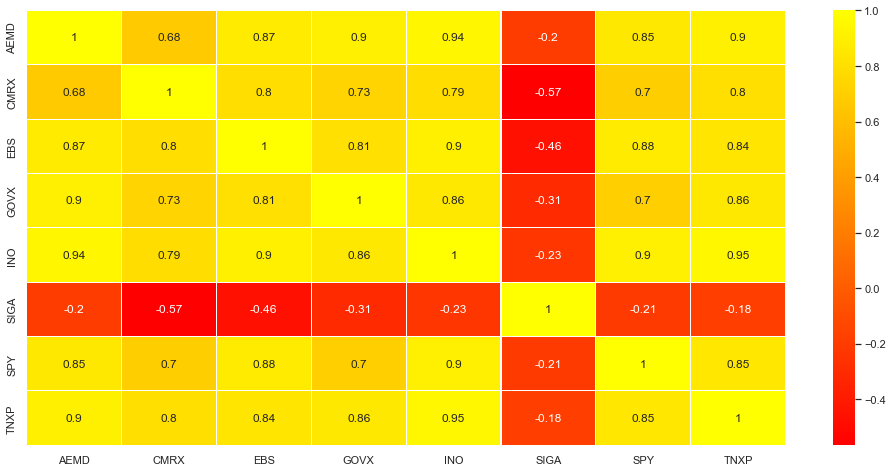

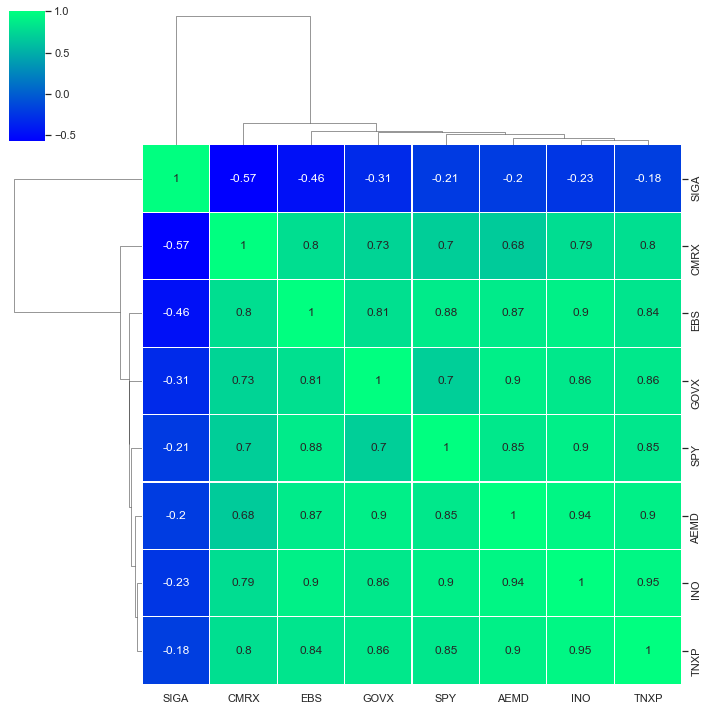

In [30]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

In [31]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [32]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [33]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  ------------------------------------------------------------------------
90%                 [-0.05690836 -0.11043173 -0.05101633 -0.09198242 -0.07870945 -0.03624549
                     -0.02156644 -0.11579543]
95%                 [-0.07157767 -0.13972285 -0.0644394  -0.11357484 -0.09859084 -0.04721375
                     -0.02711383 -0.14433231]
99%                 [-0.09909487 -0.19466812 -0.08961884 -0.15407864 -0.13588503 -0.06778839
                     -0.03751979 -0.19786275]


In [34]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
AEMD: -0.0569
CMRX: -0.1104
EBS: -0.051
GOVX: -0.092
INO: -0.0787
SIGA: -0.0362
SPY: -0.0216
TNXP: -0.1158


In [35]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 90%:
AEMD: $5690.0
CMRX: $11040.0
EBS: $5100.0
GOVX: $9200.0
INO: $7870.000000000001
SIGA: $3620.0000000000005
SPY: $2160.0
TNXP: $11580.0


In [36]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 99%:
AEMD: $9910.0
CMRX: $19470.0
EBS: $8960.0
GOVX: $15409.999999999998
INO: $13590.0
SIGA: $6780.0
SPY: $3750.0
TNXP: $19790.0


In [37]:
returns.loc[:,returns.columns!='SPY']

,AEMD,CMRX,EBS,GOVX,INO,SIGA,TNXP
Date,,,,,,,
2022-01-04,-0.020408,-0.007353,-0.016677,-0.005089,-0.034615,-0.017083,-0.075000
2022-01-05,-0.046875,-0.094815,-0.019292,-0.048593,-0.069721,-0.038770,-0.054054
2022-01-06,-0.043716,0.009820,0.045179,-0.037634,-0.004283,0.000000,-0.028571
2022-01-07,0.040000,-0.027553,0.008893,-0.011173,-0.008602,-0.022253,0.000000
2022-01-10,-0.005495,0.051667,0.029110,-0.011299,0.041215,0.008535,-0.058824
...,...,...,...,...,...,...,...
2022-05-13,0.157303,0.034146,-0.011692,0.080645,0.058511,0.005391,0.083333
2022-05-16,0.029126,-0.608491,-0.004175,-0.035821,-0.050251,0.049929,-0.307692
2022-05-17,0.047170,0.054217,0.036688,0.052632,0.052910,-0.010870,-0.232639


In [38]:
annual_returns = returns.mean() * 252
annual_returns

AEMD   -1.300879
CMRX   -1.790967
EBS    -0.923916
GOVX   -3.985363
INO    -2.161563
SIGA    0.616180
SPY    -0.503495
TNXP   -3.813087
dtype: float64

In [39]:
# Show shotcks that have higher returns than S&P500
for i in range(0, len(annual_returns)):
  if annual_returns[i] > annual_returns['SPY']:
    print(annual_returns.index[i], ':', round(annual_returns[i], 4))

SIGA : 0.6162


In [40]:
sorted_annual_returns = annual_returns.sort_values(ascending=False)
sorted_annual_returns

SIGA    0.616180
SPY    -0.503495
EBS    -0.923916
AEMD   -1.300879
CMRX   -1.790967
INO    -2.161563
TNXP   -3.813087
GOVX   -3.985363
dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

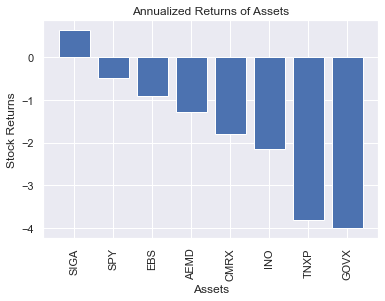

In [41]:
plt.bar(sorted_annual_returns.index, sorted_annual_returns)
plt.ylabel('Stock Returns')
plt.xlabel('Assets')
plt.title('Annualized Returns of Assets')
plt.xticks(rotation = 90)